# K-Means Clustering Example

Let's make some fake data that includes people clustered by income and age, randomly:

In [85]:
%matplotlib inline

from sklearn.cluster import KMeans                    # This is the main K means model
import matplotlib.pyplot as plt                       # Main plotting library used to display results
from sklearn.preprocessing import scale               # Used for scaling the data
import pandas as pd                                   # Will be used to load data from a csv file and also view data  


world_world_df = pd.read_csv("world_happiness.csv") 
world_world_df.head()

#Code comes from video https://www.youtube.com/watch?v=iNlZ3IU5Ffw&t=143s

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Finland,Western Europe,"7,821","1,892","1,258","0,775","0,736","0,534","0,109",2022
1,1,2,Denmark,Western Europe,"7,636","1,953","1,243","0,777","0,719","0,532","0,188",2022
2,2,3,Iceland,Western Europe,"7,557","1,936","1,320","0,803","0,718","0,191","0,270",2022
3,3,4,Switzerland,Western Europe,"7,512","2,026","1,226","0,822","0,677","0,461","0,147",2022
4,4,5,Netherlands,Western Europe,"7,415","1,945","1,206","0,787","0,651","0,419","0,271",2022


We'll use k-means to rediscover these clusters in unsupervised learning:

In [86]:
world_df.dropna(inplace = True)         # Drops any null values in the dataset

In [87]:
world_df.describe()                     # If all the null values are successfully removed then the count below should be the same for all the columns  

,Unnamed: 0,Happiness Rank,Happiness Score,Year,labels
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,76.100666,77.097338,5.437308,2018.367720,0.986689
std,44.526567,44.526350,1.116204,2.245445,0.818086
min,0.000000,1.000000,2.404000,2015.000000,0.000000
25%,38.000000,39.000000,4.593000,2016.000000,0.000000
50%,75.500000,76.500000,5.430000,2018.000000,1.000000
75%,114.000000,115.000000,6.232625,2020.000000,2.000000
max,157.000000,158.000000,7.842000,2022.000000,2.000000


In [88]:
world_df.dtypes                             # This function shows the data types of the features. As the Happiness Score column is an object/string, we need to convert it to a float

Unnamed: 0                         int64
Happiness Rank                     int64
Country                           object
Region                            object
Happiness Score                  float64
Economy (GDP per Capita)          object
Family (Social Support)           object
Health (Life Expectancy)          object
Freedom                           object
Trust (Government Corruption)     object
Generosity                        object
Year                               int64
labels                             int32
dtype: object

In [82]:
#world_df['Happiness Score'] = world_df['Happiness Score'].str.replace(',', '.').astype(float)      # Converted string to float. This was tricky as the the feature "Happiness Score" has a '.' separator
                                                                                                   # however, it only would convert when I used a comma separator as an arg in the replace method 

In [89]:
world_df.dtypes          # Now the "Happiness Score" feature is converted to a float

Unnamed: 0                         int64
Happiness Rank                     int64
Country                           object
Region                            object
Happiness Score                  float64
Economy (GDP per Capita)          object
Family (Social Support)           object
Health (Life Expectancy)          object
Freedom                           object
Trust (Government Corruption)     object
Generosity                        object
Year                               int64
labels                             int32
dtype: object

- Find optimum number of clusters
- The below function will run the algorithm multiple times to plot the inertias


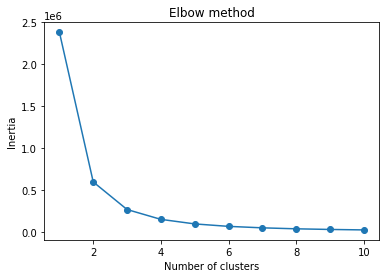

In [90]:
x = world_df["Happiness Score"]
y = world_df["Happiness Rank"]

data = list(zip(x, y))                             # W3Schools
inertias = []


for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)


plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


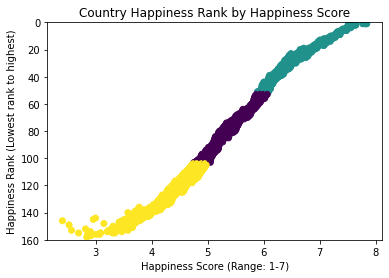

In [91]:
kmeans = KMeans(n_clusters=3)         # The above graph shows that 3 on the x axis is a good cluster value as the inertia becomes more linear at this point
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.title('Country Happiness Rank by Happiness Score')
plt.xlabel('Happiness Score (Range: 1-7)')
plt.ylim(160,0)                                           # This helps us show that the lowest happiness ranks have the lowest happiness score
plt.ylabel('Happiness Rank (Lowest rank to highest)')
plt.show()

In [92]:
print(kmeans.labels_)
world_df['labels'] = kmeans.labels_
world_df


[1 1 1 ... 2 2 2]


,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,labels
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,1
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015,1
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,1
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015,1
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,138,139,Tanzania,Sub-Saharan Africa,3.702,"0,848","0,597","0,425","0,578","0,270","0,248",2022,2
1198,139,140,Sierra Leone,Sub-Saharan Africa,3.574,"0,686","0,416","0,273","0,387","0,055","0,202",2022,2
1199,143,144,Zimbabwe,Sub-Saharan Africa,2.995,"0,947","0,690","0,270","0,329","0,105","0,106",2022,2
1200,144,145,Lebanon,Middle East and Northern Africa,2.955,"1,392","0,498","0,631","0,103","0,034","0,082",2022,2
